In [ ]:
# import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
import io
data=files.upload()


Saving masterlist.csv to masterlist.csv


In [ ]:
df = pd.read_csv(io.StringIO(data['masterlist.csv'].decode('utf-8')))

<ipython-input-4-0f9bd5382777>:1: DtypeWarning: Columns (4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data['masterlist.csv'].decode('utf-8')))


In [ ]:
df.head(5)

,Unnamed: 0,Date,User,Tweet,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0,2011-12-31 23:47:01+00:00,RakeshSethi1,How to control and even reverse diabetes? Natu...,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2011-12-31 21:24:52+00:00,HDYGDC,"How come I often hear that you can ""reverse"" d...",NaN,NaN,NaN,NaN,NaN,NaN
2,2,2011-12-31 21:24:49+00:00,MattChandler8,"How come I often hear that you can ""reverse"" d...",NaN,NaN,NaN,NaN,NaN,NaN
3,3,2011-12-31 19:00:19+00:00,GscalpiRD_CDE,Do you have #pre-diabetes? Learn how you can ...,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2011-12-31 17:54:05+00:00,JoanDiabetic,Reverse Diabetes Type 2- What Could you achiev...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop the rows with NaN values in the 'Tweet' column
df.dropna(subset=['Tweet'], inplace=True)


In [ ]:
#Clean the text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text

df['Tweet'] = df['Tweet'].apply(cleanTxt)



In [ ]:
#Change the type of Tweet column into string
df['Tweet'] = df['Tweet'].astype(str)


In [ ]:
df = df.drop(columns=["Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9"])


In [ ]:
df

,Unnamed: 0,Date,User,Tweet
0,0,2011-12-31 23:47:01+00:00,RakeshSethi1,How to control and even reverse diabetes? Natu...
1,1,2011-12-31 21:24:52+00:00,HDYGDC,"How come I often hear that you can ""reverse"" d..."
2,2,2011-12-31 21:24:49+00:00,MattChandler8,"How come I often hear that you can ""reverse"" d..."
3,3,2011-12-31 19:00:19+00:00,GscalpiRD_CDE,Do you have pre-diabetes? Learn how you can m...
4,4,2011-12-31 17:54:05+00:00,JoanDiabetic,Reverse Diabetes Type 2- What Could you achiev...
...,...,...,...,...
74224,8268,2020-01-01 04:52:56+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...
74225,8269,2020-01-01 04:51:58+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...
74226,8270,2020-01-01 04:51:06+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...
74227,8271,2020-01-01 04:42:44+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE 2...


In [ ]:
df.reset_index(drop=True)

,Unnamed: 0,Date,User,Tweet
0,0,2011-12-31 23:47:01+00:00,RakeshSethi1,How to control and even reverse diabetes? Natu...
1,1,2011-12-31 21:24:52+00:00,HDYGDC,"How come I often hear that you can ""reverse"" d..."
2,2,2011-12-31 21:24:49+00:00,MattChandler8,"How come I often hear that you can ""reverse"" d..."
3,3,2011-12-31 19:00:19+00:00,GscalpiRD_CDE,Do you have pre-diabetes? Learn how you can m...
4,4,2011-12-31 17:54:05+00:00,JoanDiabetic,Reverse Diabetes Type 2- What Could you achiev...
...,...,...,...,...
74193,8268,2020-01-01 04:52:56+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...
74194,8269,2020-01-01 04:51:58+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...
74195,8270,2020-01-01 04:51:06+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...
74196,8271,2020-01-01 04:42:44+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE 2...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


In [ ]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity']=df['Tweet'].apply(getSubjectivity)
df['Polarity']=df['Tweet'].apply(getPolarity)

In [ ]:
df.reset_index(drop=True)

,Unnamed: 0,Date,User,Tweet,Subjectivity,Polarity
0,0,2011-12-31 23:47:01+00:00,RakeshSethi1,How to control and even reverse diabetes? Natu...,0.450000,0.3000
1,1,2011-12-31 21:24:52+00:00,HDYGDC,"How come I often hear that you can ""reverse"" d...",0.687500,-0.3125
2,2,2011-12-31 21:24:49+00:00,MattChandler8,"How come I often hear that you can ""reverse"" d...",0.687500,-0.3125
3,3,2011-12-31 19:00:19+00:00,GscalpiRD_CDE,Do you have pre-diabetes? Learn how you can m...,1.000000,0.0000
4,4,2011-12-31 17:54:05+00:00,JoanDiabetic,Reverse Diabetes Type 2- What Could you achiev...,0.000000,0.0000
...,...,...,...,...,...,...
74193,8268,2020-01-01 04:52:56+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...,0.357143,0.0000
74194,8269,2020-01-01 04:51:58+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...,0.357143,0.0000
74195,8270,2020-01-01 04:51:06+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...,0.357143,0.0000
74196,8271,2020-01-01 04:42:44+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE 2...,0.408036,0.2125


In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)



In [ ]:
#Reset the index
df.reset_index(drop=True)

,Unnamed: 0,Date,User,Tweet,Subjectivity,Polarity,Analysis
0,0,2011-12-31 23:47:01+00:00,RakeshSethi1,How to control and even reverse diabetes? Natu...,0.450000,0.3000,Positive
1,1,2011-12-31 21:24:52+00:00,HDYGDC,"How come I often hear that you can ""reverse"" d...",0.687500,-0.3125,Negative
2,2,2011-12-31 21:24:49+00:00,MattChandler8,"How come I often hear that you can ""reverse"" d...",0.687500,-0.3125,Negative
3,3,2011-12-31 19:00:19+00:00,GscalpiRD_CDE,Do you have pre-diabetes? Learn how you can m...,1.000000,0.0000,Neutral
4,4,2011-12-31 17:54:05+00:00,JoanDiabetic,Reverse Diabetes Type 2- What Could you achiev...,0.000000,0.0000,Neutral
...,...,...,...,...,...,...,...
74193,8268,2020-01-01 04:52:56+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...,0.357143,0.0000,Neutral
74194,8269,2020-01-01 04:51:58+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...,0.357143,0.0000,Neutral
74195,8270,2020-01-01 04:51:06+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE ...,0.357143,0.0000,Neutral
74196,8271,2020-01-01 04:42:44+00:00,TeriChesney,DO THIS SIMPLE 60-SEC HABIT\nTO REVERSE TYPE 2...,0.408036,0.2125,Positive


In [ ]:
#delete duplicate tweets
df = df.groupby('User').apply(lambda x: x.drop_duplicates(subset='Tweet'))
df.reset_index(drop=True, inplace=True)


In [ ]:
df

,Unnamed: 0,Date,User,Tweet,Subjectivity,Polarity,Analysis
0,1525,2018-11-20 19:42:55+00:00,000funsize,_55 Well since you're taking your meds an...,0.000000,0.000000,Neutral
1,3488,2019-08-30 07:47:11+00:00,0123456789alan,September 2019 Promotional Offer-\n\nWe are of...,0.566667,0.325000,Positive
2,5876,2019-06-08 20:46:14+00:00,0123456789alan,moekahn11 : I will reverse diabetes type 1 and...,0.000000,0.000000,Neutral
3,10315,2018-07-12 13:12:28+00:00,01KAROLA,We need strengthtraining &amp; fitdance aerobi...,0.750000,0.125000,Positive
4,11806,2011-04-21 07:25:19+00:00,0526coza,Diet may reverse diabetes kidney failure - Kid...,0.311111,-0.155556,Negative
...,...,...,...,...,...,...,...
57851,2245,2019-10-15 09:53:05+00:00,zzadoc,I already knew I had heart disease and diab...,0.450000,-0.050000,Negative
57852,5172,2019-06-25 10:56:53+00:00,zzelace,"Increase Blood Platelets, Kill Cancer, Heal Ul...",0.000000,0.000000,Neutral
57853,2310,2019-10-12 14:01:48+00:00,zzzjeffree,I work with people who have reversed their ...,0.000000,0.000000,Neutral
57854,5987,2019-06-06 14:55:18+00:00,zzzjeffree,Great.\nNow let's get people real information...,0.550000,0.300000,Positive


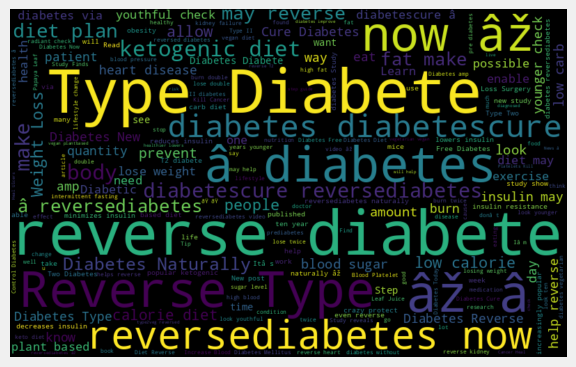

In [ ]:
#plot Word Cloud
allWords=' '.join([twts for twts in df['Tweet']])
wordCloud=WordCloud(width=800,height=500,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(j) + ') '+sortedDF['Tweet'][i])
        print()
        j=j+1


Streaming output truncated to the last 5000 lines.
25368) _Queen    Type II diabetes is preventable and often reversible. My grandfather died young of diabetic complications, even though he was injecting insulin. My mother started digging into the science, and she was able to reverse her diabetes, and my aunt is making progress as well.

25369) Can a strict calorie reduction reverse diabetes? Has it crossed the line between healthy and extreme? 

25370) Doctor Explain How Fasting Can Completely Reverse Type 2 Diabetes  meditation 

25371) OurPath raises $3M in round led by Connect Ventures to â€˜reverseâ€™ Type 2 Diabetes: There are many, many tech startups tackling the problem of diabetes. You only have to look at the TechCrunch tag to find some of the latest, and even the Apple Watch isâ€¦  

25372) _13 and to think this whole time Iâ€™ve been trying to reverse my impending diabetes without knowing the PERKS

25373) Click link for Groundbreaking New Research that Shows How to Reverse

In [ ]:


# Count the number of positive tweets containing keywords related to exercise and diet
exercise_count = 0
diet_count = 0
other_count = 0
positive_count = 0
other_tweets = []

for tweet in df[df['Analysis'] == 'Positive']['Tweet']:
    if re.search(r'\bexercise\b|\bworkout\b|\bfitness\b', tweet, re.IGNORECASE):
        exercise_count += 1
    elif re.search(r'\bdiet\b|\bnutrition\b|\bfood\b', tweet, re.IGNORECASE):
        diet_count += 1
    else:
        other_count += 1
        other_tweets.append(tweet)
    positive_count += 1

# Calculate the percentage of positive tweets containing keywords related to exercise and diet
exercise_percent = exercise_count / positive_count * 100
diet_percent = diet_count / positive_count * 100
other_percent = other_count / positive_count * 100

print(f"{exercise_percent:.2f}% of positive tweets mention exercise, {diet_percent:.2f}% mention diet, and {other_percent:.2f}% do not mention either.")

# Print a sample of tweets that do not mention either exercise or diet
if other_count > 0:
    print("Here are some examples of tweets that do not mention exercise or diet:")
    for tweet in other_tweets[:5]:
        print(tweet)
        print()
else:
    print("There are no positive tweets that do not mention either exercise or diet.")


3.04% of positive tweets mention exercise, 24.72% mention diet, and 72.24% do not mention either.
Here are some examples of tweets that do not mention exercise or diet:
September 2019 Promotional Offer-

We are offering the first 20 'Type 2 Diabetes' person - FREE SERVICE to reverse their type 2 diabetes - upon qualified. 

Candidates must have to reside in Toronto or GTA. 

To... 

We need strengthtraining &amp; fitdance aerobic 
but resistance training is the only way to reverse sarcopenia, age-related loss of muscle tissue

Sarcopenia leads to loss of vitality, an increased risk of falling, &amp; higher type 2 diabetes risk

chicagobtc 
carolinanunezcoach 


This is video 3 of 3 that talks about the breakthrough and the game changers I encountered from more than 200 hours of research to reverse diabetes type 2


In order to reverse Type 2 Diabetes naturally in 2016 and 2017 I first spent more than 200 hours researching the problem.
I found I had to look outside the boundaries of con

In [ ]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+sortedDF['Tweet'][i])
    print()
    j=j+1


Streaming output truncated to the last 5000 lines.

changes in diet start to reverse these conditions in a matter of weeks

4147) Six ways to prevent (or reverse) Type 2 diabetes: You can lose one pound a week just by cutting about 500 calori... 

4148) A low carbohydrate diet is now common sense for those with diabetes or those who want to prevent diabetes. Itâ€™s one of the few diets Iâ€™ve seen reverse diabetes.  diet ketogenicdiet  diabetes lchf lowcarb Keto

4149)  I have had many type two diabetic reverse their diabetes by reducing sugar and minimizing simple carbohydrates to less than 50 g per day. Youâ€™re right, itâ€™s not right at times. At  the worst, they are requiring less medication.

4150) Is it possible to reverse type 2 diabetes?: Some people with type 2 diabetes (usually those diagnosed relatively... 

4151) Diabetes: a delicate balance: Can an extreme low-calorie diet help to reverse diabetes? How about a dip in the D... 

4152) Patients Reverse Type 2 Diabetes and O

In [ ]:
#Print all of the neutral tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Neutral'):
        print(str(j) + ') '+sortedDF['Tweet'][i])
        print()
        j=j+1

Streaming output truncated to the last 5000 lines.

21845) reversediabetes now âž¤  â™¥ Lose Glucose Management or Hope? â™¥ diabetes diabetescure â™¥

21846) reversediabetes now âž¤  â™¥ Aaron Vinik Part 7, Endocrinology of Aging â™¥ diabetes diabetescure â™¥

21847) reversediabetes now âž¤  â™¥ 100 % Work - Cure Diabetes Permanently â™¥ diabetes diabetescure

21848) reversediabetes now âž¤  â™¥ Woman set to REVERSE her weight-induced type 2 diabetes with Â£6.99 app -  â™¥ diabetes diabetescure

21849) reversediabetes now âž¤  â™¥ Losing weight can reverse diabetes without medication - Gulf Times â™¥ diabetes diabetescure

21850) reversediabetes now âž¤  â™¥ Losing weight can reverse diabetes without drugs - The Nation Newspaper â™¥ diabetes diabetescure

21851) reversediabetes now âž¤  â™¥ Radical diet can reverse diabetes - 4BC â™¥ diabetes diabetescure

21852) reversediabetes now âž¤  â™¥ 15. Diabetes Advocacy: Standards of Medical Care in Diabetesâ€”2018 â™¥ diabetes diabetescure


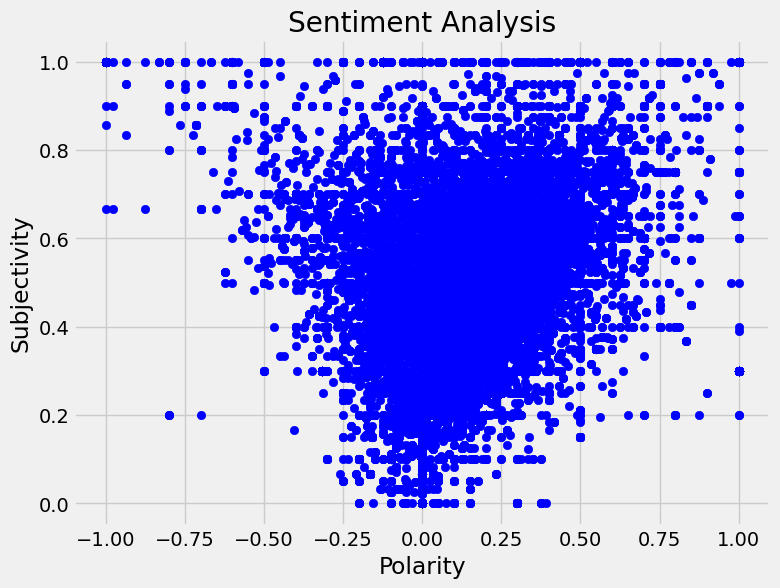

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'], df['Subjectivity'], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
#get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)


47.4

In [ ]:
#get the percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweet']
round((ntweets.shape[0]/df.shape[0])*100,1)


10.8

In [ ]:
#get the percentage of neutral tweets
neutweets=df[df.Analysis=='Neutral']
neutweets=neutweets['Tweet']
round((neutweets.shape[0]/df.shape[0])*100,1)

41.8

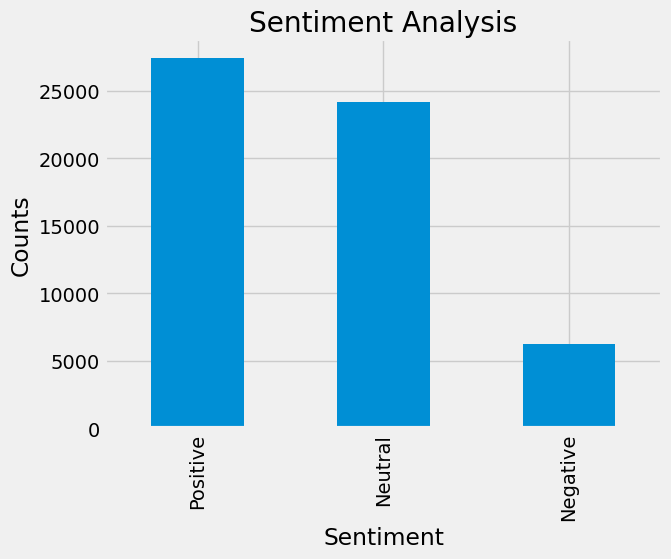

In [ ]:
#Show the value counts
df['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


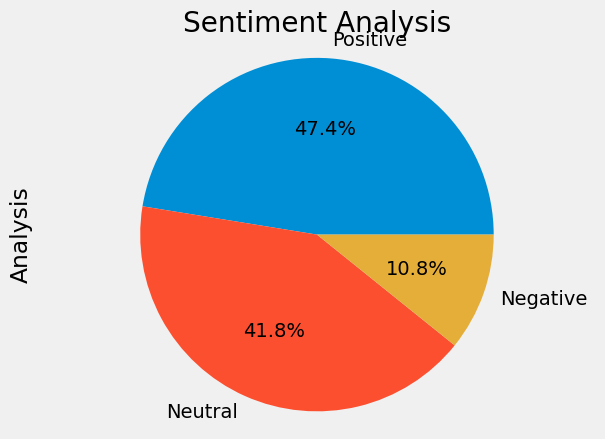

In [ ]:
# assuming that the sentiment analysis results are stored in the "Analysis" column of df
sentiment_counts = df['Analysis'].value_counts()

# plot pie chart
plt.title('Sentiment Analysis')
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()